In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [170]:
forecast_weather = pd.read_csv('../../Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('../../Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [111]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [177]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).sum().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [112]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [169]:
real_weather[real_weather['지점명']=='구미']

,지점,위도,경도,지점명,일시,기온,풍속,풍향,습도,강수량
1504656,279,36.1306,128.3206,구미,2021-01-01 00:00,-4.3,1.9,290.0,61.0,0.0
1504657,279,36.1306,128.3206,구미,2021-01-01 01:00,-4.8,0.5,320.0,64.0,0.0
1504658,279,36.1306,128.3206,구미,2021-01-01 02:00,-5.4,1.6,320.0,69.0,0.0
1504659,279,36.1306,128.3206,구미,2021-01-01 03:00,-4.4,1.8,290.0,68.0,0.0
1504660,279,36.1306,128.3206,구미,2021-01-01 04:00,-4.9,1.3,290.0,68.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1522147,279,36.1306,128.3206,구미,2022-12-30 20:00,-0.3,0.0,0.0,65.0,0.0
1522148,279,36.1306,128.3206,구미,2022-12-30 21:00,-1.0,0.0,0.0,67.0,0.0
1522149,279,36.1306,128.3206,구미,2022-12-30 22:00,-1.0,0.0,0.0,67.0,0.0
1522150,279,36.1306,128.3206,구미,2022-12-30 23:00,-0.4,0.1,0.0,63.0,0.0


In [114]:
incheon = real_weather[real_weather['지점명'] =='구미']

In [115]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

In [116]:
eda_weather.set_index('일시', inplace=True)

In [117]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [118]:
solar_2

,datetime,target
0,2020-09-10 0:00,NaN
1,2020-09-10 0:10,NaN
2,2020-09-10 0:20,NaN
3,2020-09-10 0:30,NaN
4,2020-09-10 0:40,NaN
...,...,...
86107,2022-04-30 23:10,0.0
86108,2022-04-30 23:20,0.0
86109,2022-04-30 23:30,0.0
86110,2022-04-30 23:40,0.0


In [119]:
solar_2.datetime = pd.to_datetime(solar_2.datetime)

In [120]:
solar_2.set_index('datetime', inplace=True)

In [145]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [146]:
x

,위도,경도,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,,,
2021-01-01 00:00:00,36.1306,128.3206,-4.3,1.9,290.0,61.0,0.0,0,1,2021
2021-01-01 01:00:00,36.1306,128.3206,-4.8,0.5,320.0,64.0,0.0,1,1,2021
2021-01-01 02:00:00,36.1306,128.3206,-5.4,1.6,320.0,69.0,0.0,2,1,2021
2021-01-01 03:00:00,36.1306,128.3206,-4.4,1.8,290.0,68.0,0.0,3,1,2021
2021-01-01 04:00:00,36.1306,128.3206,-4.9,1.3,290.0,68.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,36.1306,128.3206,16.3,0.9,290.0,54.0,0.0,19,4,2022
2022-04-30 20:00:00,36.1306,128.3206,16.0,1.9,290.0,55.0,0.0,20,4,2022
2022-04-30 21:00:00,36.1306,128.3206,15.3,1.3,320.0,54.0,0.0,21,4,2022


In [167]:
solar_2.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

,target
datetime,
2021-01-01 00:00:00,0.0
2021-01-01 00:10:00,0.0
2021-01-01 00:20:00,0.0
2021-01-01 00:30:00,0.0
2021-01-01 00:40:00,0.0
...,...
2022-04-30 22:20:00,0.0
2022-04-30 22:30:00,0.0
2022-04-30 22:40:00,0.0


In [161]:
y = solar_2.loc[x.index]

In [150]:
x.drop(['위도','경도'], axis=1, inplace=True)

In [162]:
total = pd.concat([x, y], axis = 1)

In [156]:
total.interpolate(method = 'linear', inplace = True)

In [157]:
total

,기온,풍속,풍향,습도,강수량,hour,month,year,target
일시,,,,,,,,,
2021-01-01 00:00:00,-4.3,1.9,290.0,61.0,0.0,0,1,2021,0.0
2021-01-01 01:00:00,-4.8,0.5,320.0,64.0,0.0,1,1,2021,0.0
2021-01-01 02:00:00,-5.4,1.6,320.0,69.0,0.0,2,1,2021,0.0
2021-01-01 03:00:00,-4.4,1.8,290.0,68.0,0.0,3,1,2021,0.0
2021-01-01 04:00:00,-4.9,1.3,290.0,68.0,0.0,4,1,2021,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,16.3,0.9,290.0,54.0,0.0,19,4,2022,5.1
2022-04-30 20:00:00,16.0,1.9,290.0,55.0,0.0,20,4,2022,0.0
2022-04-30 21:00:00,15.3,1.3,320.0,54.0,0.0,21,4,2022,0.0


In [ ]:
y = total.value
x = total.drop('value', axis=1)

In [20]:
slice = 455 * 24

In [21]:
x_train = x.iloc[:slice]
x_test = x.iloc[slice:]
y_train = y.iloc[:slice]
y_test = y.iloc[slice:]

In [22]:
sc = StandardScaler()

In [23]:
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [24]:
sc.fit(y_train.values.reshape(-1,1))

y_train = sc.transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))

In [25]:
print(x_train.shape)
print(x_test.shape)

(10920, 8)
(720, 8)


In [26]:
y_train.shape

(10920, 1)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [29]:
dt = DecisionTreeRegressor(max_depth=5)

In [30]:
params = {
    'n_estimators' : [5,10,50,100],
    'max_depth': [2,5,6,8,10],
    'min_samples_leaf':[4,8,12,16],
    'min_samples_split':[4,8,16,20,24]
}

In [31]:
rf = RandomForestRegressor(n_estimators=300, n_jobs = -1)
et = ExtraTreesRegressor(n_estimators=300, n_jobs = -1)
lg = LGBMRegressor(n_estimators=300, n_jobs = -1)

In [32]:
grid_cv_rf = GridSearchCV(rf, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [33]:
grid_cv_et = GridSearchCV(et, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_et.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_estimators=300, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [34]:
grid_cv_lg = GridSearchCV(lg, param_grid=params,
                      cv=5, n_jobs=-1)
grid_cv_lg.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 8
[LightGBM] [Info] Start training from score 0.000000


GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimators=300, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 6, 8, 10],
                         'min_samples_leaf': [4, 8, 12, 16],
                         'min_samples_split': [4, 8, 16, 20, 24],
                         'n_estimators': [5, 10, 50, 100]})

In [35]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001)

In [36]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(LSTM(512, input_shape=(8, 1), return_sequences=True))
lstm_model.add(LSTM(256))
lstm_model.add(Dense(24))
lstm_model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])

In [37]:
window_size = 24 * 365

In [38]:
from tqdm import tqdm

In [39]:
grid_cv_rf.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_et.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_lg.best_estimator_.fit(x_train[:window_size], y_train[:window_size])

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 7
[LightGBM] [Info] Start training from score -0.009402


LGBMRegressor(max_depth=2, min_samples_leaf=16, min_samples_split=4, n_jobs=-1)

In [40]:
predictions_list = []

for i in tqdm(range(0, len(x_test), 24)):
    x_test_window = x_test[i:i+24]
    y_test_window = y_test[i:i+24]

    predictions_rf = grid_cv_rf.best_estimator_.predict(x_test_window)
    predictions_et = grid_cv_et.best_estimator_.predict(x_test_window)
    predictions_lg = grid_cv_lg.best_estimator_.predict(x_test_window)

    for j in range(24):
        predictions_list.append([predictions_rf[j], predictions_et[j], predictions_lg[j]])

    x_train = np.concatenate((x_train, x_test_window), axis=0)
    y_train = np.concatenate((y_train, y_test_window), axis=0)

    grid_cv_rf.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])
    grid_cv_et.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])
    grid_cv_lg.best_estimator_.fit(x_train[i+24:i+24+window_size], y_train[i+24:i+24+window_size])

predictions_array = np.array(predictions_list)

  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

  7%|▋         | 2/30 [00:00<00:03,  7.17it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 10%|█         | 3/30 [00:00<00:03,  8.05it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 13%|█▎        | 4/30 [00:00<00:03,  8.56it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 17%|█▋        | 5/30 [00:00<00:02,  8.87it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 20%|██        | 6/30 [00:00<00:02,  8.87it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 23%|██▎       | 7/30 [00:00<00:02,  8.70it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 27%|██▋       | 8/30 [00:00<00:02,  8.66it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 30%|███       | 9/30 [00:01<00:02,  8.91it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 33%|███▎      | 10/30 [00:01<00:02,  8.97it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 37%|███▋      | 11/30 [00:01<00:02,  8.79it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 40%|████      | 12/30 [00:01<00:02,  8.54it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 43%|████▎     | 13/30 [00:01<00:02,  8.41it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 50%|█████     | 15/30 [00:01<00:01,  8.33it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 57%|█████▋    | 17/30 [00:01<00:01,  8.79it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 60%|██████    | 18/30 [00:02<00:01,  8.98it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 63%|██████▎   | 19/30 [00:02<00:01,  9.00it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 67%|██████▋   | 20/30 [00:02<00:01,  8.86it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 70%|███████   | 21/30 [00:02<00:00,  9.02it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 73%|███████▎  | 22/30 [00:02<00:00,  9.14it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 77%|███████▋  | 23/30 [00:02<00:00,  9.24it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 80%|████████  | 24/30 [00:02<00:00,  9.28it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 83%|████████▎ | 25/30 [00:02<00:00,  9.34it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 87%|████████▋ | 26/30 [00:02<00:00,  9.37it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 90%|█████████ | 27/30 [00:03<00:00,  9.40it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 93%|█████████▎| 28/30 [00:03<00:00,  9.42it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

 97%|█████████▋| 29/30 [00:03<00:00,  9.40it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

100%|██████████| 30/30 [00:03<00:00,  9.33it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 8
[LightGBM] [Info] Start

100%|██████████| 30/30 [00:03<00:00,  8.84it/s]


lstm_model.fit(x_train[:window_size].reshape(-1, 8, 1), y_train[:window_size], epochs=100, verbose=0)

lstm_predictions_list = []

# 테스트 데이터를 24시간 단위로 이동하면서 예측
for i in tqdm(range(0, len(x_test), 24)):
    x_test_window = x_test[i:i+24].values.reshape(-1, 8, 1)
    y_test_window = y_test[i:i+24]

    predictions_lstm = lstm_model.predict(x_test_window)
    
    # 각 샘플에 대한 예측을 저장
    for j in range(24):
        lstm_predictions_list.append(predictions_lstm[j])

    # 새로운 24시간 데이터를 훈련 데이터에 추가
    x_train = np.concatenate((x_train, x_test_window.reshape(-1, 8)), axis=0)
    y_train = np.concatenate((y_train, y_test_window), axis=0)

    # 새로운 윈도우 크기로 훈련
    lstm_model.fit(x_train[i+24:i+24+window_size].reshape(-1, 8, 1), y_train[i+24:i+24+window_size], epochs=100, verbose=0)

lstm_predictions_array = np.array(lstm_predictions_list)

lstm_predictions_array.shape

plt.plot(lstm_predictions_array.reshape(-1,1)) 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
grid_cv_rf.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_et.best_estimator_.fit(x_train[:window_size], y_train[:window_size])
grid_cv_lg.best_estimator_.fit(x_train[:window_size], y_train[:window_size])

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 7
[LightGBM] [Info] Start training from score -0.009402


LGBMRegressor(max_depth=2, min_samples_leaf=16, min_samples_split=4, n_jobs=-1)

In [43]:
train_predictions_list = []

# 훈련 데이터에 대한 예측 수집
for i in range(0, len(x_train), 24):
    x_train_window = x_train[i:i+window_size]

    train_predictions_rf = grid_cv_rf.best_estimator_.predict(x_train_window)
    train_predictions_et = grid_cv_et.best_estimator_.predict(x_train_window)
    train_predictions_lg = grid_cv_lg.best_estimator_.predict(x_train_window)

    for j in range(24):
        train_predictions_list.append([train_predictions_rf[j], train_predictions_et[j], train_predictions_lg[j]])

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warnin

In [44]:
train_predictions_array = np.array(train_predictions_list)

In [45]:
meta_model = LinearRegression()

In [46]:
meta_model.fit(train_predictions_array, y_train[:len(train_predictions_array)])

LinearRegression()

In [47]:
meta_result = meta_model.predict(np.nan_to_num(predictions_array, nan = 0))

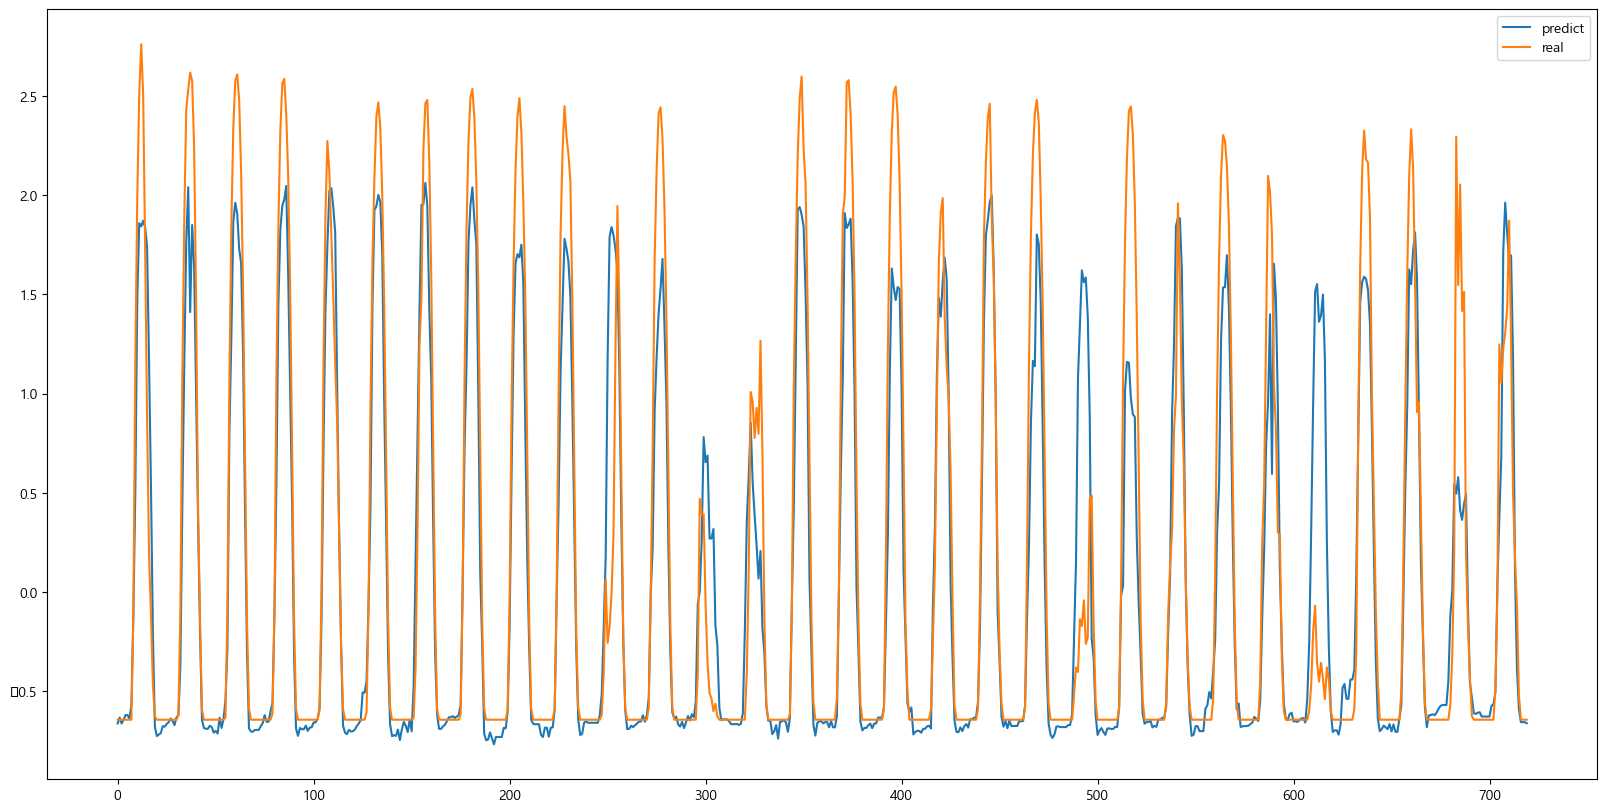

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(meta_result)), meta_result, label='predict')
plt.plot(np.arange(len(meta_result)), y_test, label='real')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [66]:
mean_absolute_error(sc.inverse_transform(meta_result), sc.inverse_transform(y_test))

321.84706882467856

In [ ]:
sc.inverse_transform(y_test)

In [50]:
mean_squared_error(y_test, meta_result)

0.21149553975162613

In [51]:
mean_absolute_error(y_test, meta_result)

0.2723612450071131

In [52]:
mean_absolute_error(y_test[:24], meta_result[:24])

0.2788562806604656

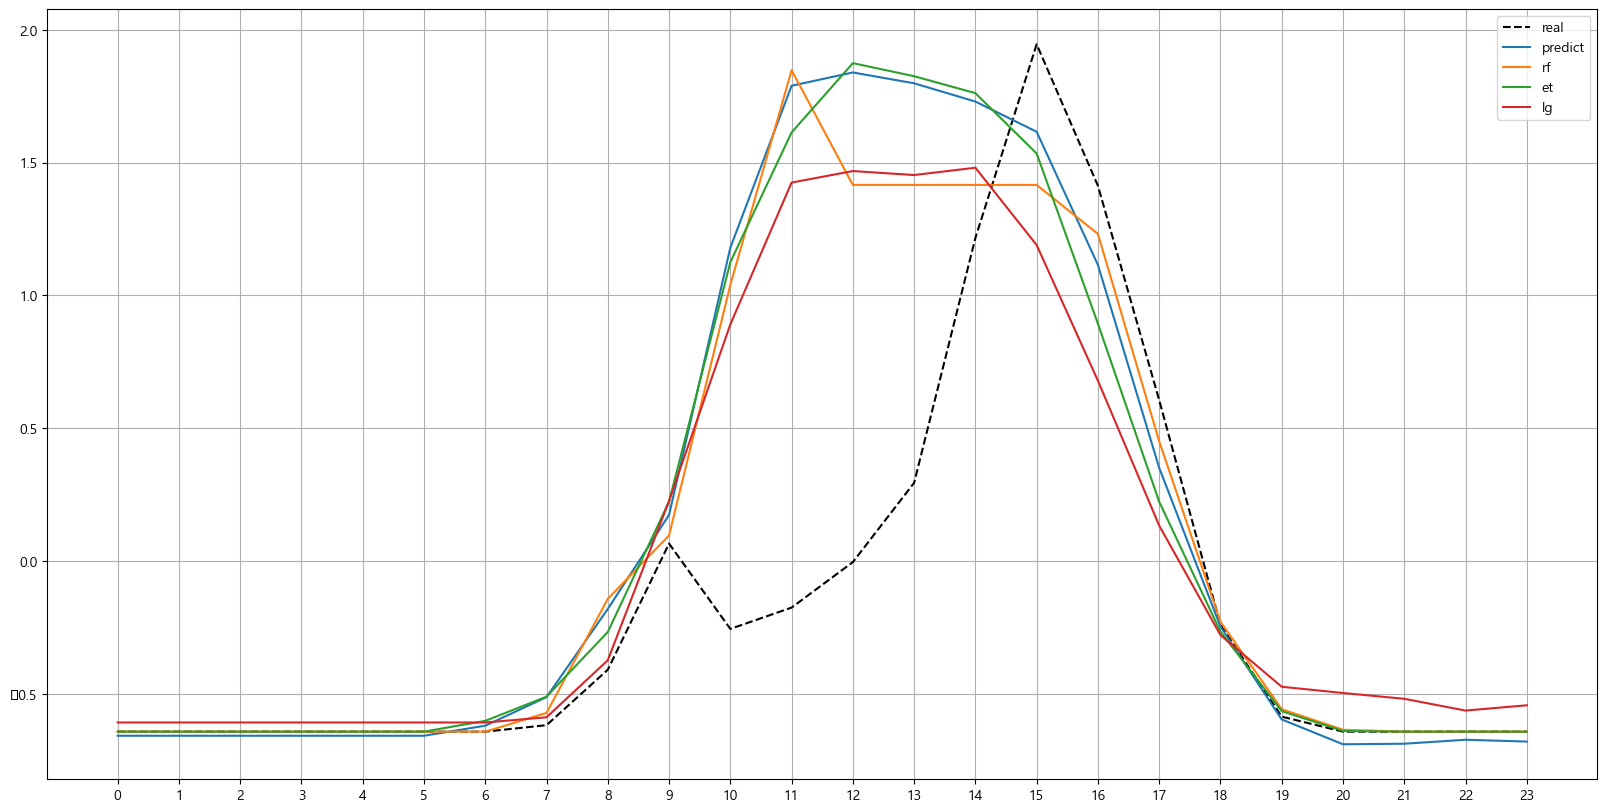

0.370065703736393

In [77]:
i = 10
plt.figure(figsize=(20,10))
plt.plot(np.arange(24), y_test[i * 24 : 24*(i+1)], 'k--')
plt.plot(np.arange(24), meta_result[i * 24 : 24*(i+1)])

plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),0])
plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),1])
plt.plot(np.arange(24), pd.DataFrame(predictions_array).iloc[i * 24 : 24*(i+1),2])
plt.legend(['real','predict', 'rf', 'et', 'lg'])
plt.xticks(np.arange(24))
plt.grid()
plt.show()

mean_absolute_error(y_test[i * 24 : 24*(i+1)], meta_result[i * 24 : 24*(i+1)])